##**NLP ML SUBMISSION**

**I GEDE KADEK RESTU KARTANA WAISNAWA**

Dicoding ID: **restuwaisnawa**

Email: **restuwaisnawa@gmail.com**

Dataset link: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#get dataset
df = pd.read_csv('train.txt', sep=";", names=["Description","Emotion"])
df.head()

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
#dataset check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  16000 non-null  object
 1   Emotion      16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [4]:
#total label data check
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [5]:
#one hot encoding
category = pd.get_dummies(df.Emotion)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Emotion')
new_df.head()

,Description,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0


In [6]:
#transform data in to array
desc = new_df['Description'].values
label = new_df[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

In [7]:
#train and validation set split
desc_train, desc_test, label_train, label_test = train_test_split(desc, label, test_size=0.2)

In [8]:
#data tokenizing
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(desc_train)

#data sequencing
train_sequence = tokenizer.texts_to_sequences(desc_train)
test_sequence = tokenizer.texts_to_sequences(desc_test)

#data padding
train_padded = pad_sequences(train_sequence)
test_padded = pad_sequences(test_sequence)

In [9]:
#making model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=16000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1024000   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 3

In [10]:
#model compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
#callbacks
class AutoAccuracyStop(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('accuracy')
        current_val_accuracy = logs.get('val_accuracy')

        if current_accuracy is not None and current_accuracy > 0.91 and \
           current_val_accuracy is not None and current_val_accuracy > 0.91:
            print('\nAccuracy has greater than 91%. Training Stopped')
            self.model.stop_training = True

auto_stop = AutoAccuracyStop()

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1)

In [12]:
#model training
history = model.fit(
    train_padded, label_train, epochs=40,
    validation_data=(test_padded, label_test),
    verbose=2,
    callbacks=[auto_stop, early_stopping])

Epoch 1/40
400/400 - 52s - loss: 1.4336 - accuracy: 0.4121 - val_loss: 0.9675 - val_accuracy: 0.6397 - 52s/epoch - 129ms/step
Epoch 2/40
400/400 - 41s - loss: 0.7385 - accuracy: 0.7113 - val_loss: 0.6411 - val_accuracy: 0.7441 - 41s/epoch - 102ms/step
Epoch 3/40
400/400 - 44s - loss: 0.4806 - accuracy: 0.7908 - val_loss: 0.5162 - val_accuracy: 0.8009 - 44s/epoch - 109ms/step
Epoch 4/40
400/400 - 39s - loss: 0.2845 - accuracy: 0.9019 - val_loss: 0.3410 - val_accuracy: 0.9000 - 39s/epoch - 99ms/step
Epoch 5/40
400/400 - 42s - loss: 0.1872 - accuracy: 0.9427 - val_loss: 0.3553 - val_accuracy: 0.9000 - 42s/epoch - 105ms/step
Epoch 6/40
400/400 - 40s - loss: 0.1370 - accuracy: 0.9591 - val_loss: 0.3390 - val_accuracy: 0.9094 - 40s/epoch - 99ms/step
Epoch 7/40

Accuracy has greater than 91%. Training Stopped
400/400 - 40s - loss: 0.1128 - accuracy: 0.9652 - val_loss: 0.3417 - val_accuracy: 0.9112 - 40s/epoch - 100ms/step


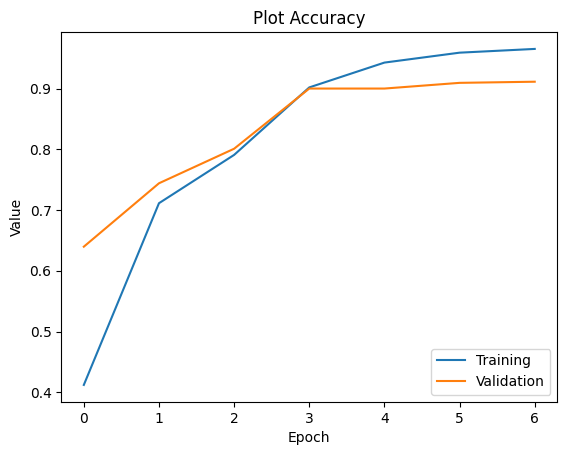

In [13]:
#plot accuracy
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Plot Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

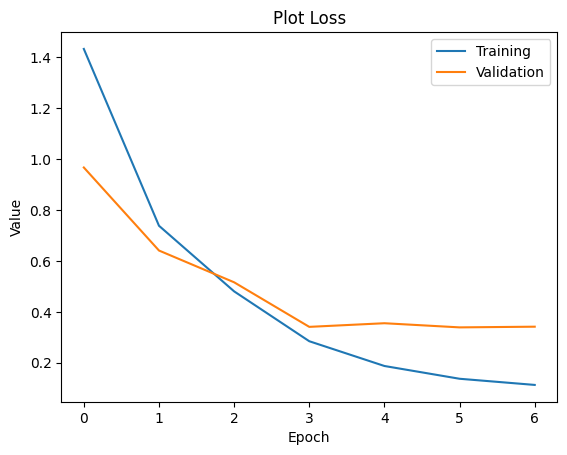

In [14]:
#plot loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Plot Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()